In [ ]:
%load_ext autoreload

from nettree import NetTree
import pandas as pd

## Minimal Example

In [10]:
df = pd.DataFrame(data={
    's_0': ['a', 'c', 'b', 'a', 'a', 'a', 'a'],
    's_1': ['e', 'b', 'd', 'a', 'b', 'c', 'b'],
    's_2': ['a', 'b', 'a', 'b', 'c', 'b', 'b']
})
rule = [
    {
        'symbol': 'a',
        'series': 's_0',
        'op': '=',
        'gap': (1, 1),
    },
    {
        'symbol': 'a',
        'series': 's_0', 
        'op': '=',
        'gap': (0, 1),
    },
    {
        'symbol': 'b',
        'series': 's_2',
        'op': '=',
        'gap': (0, 1),
    }
]
print(df)
print(rule)

  s_0 s_1 s_2
0   a   e   a
1   c   b   b
2   b   d   a
3   a   a   b
4   a   b   c
5   a   c   b
6   a   b   b
[{'symbol': 'a', 'series': 's_0', 'op': '=', 'gap': (1, 1)}, {'symbol': 'a', 'series': 's_0', 'op': '=', 'gap': (0, 1)}, {'symbol': 'b', 'series': 's_2', 'op': '=', 'gap': (0, 1)}]


In [11]:
%autoreload 2
tree = NetTree(
    data=df,
    rule=rule
)
tree.build()

data = [[a: (0, 1) c: (1, 2) b: (2, 3) a: (3, 4) a: (4, 5) a: (5, 6) a: (6, 6)]
 [e: (0, 1) b: (1, 2) d: (2, 3) a: (3, 4) b: (4, 5) c: (5, 6) b: (6, 6)]
 [a: (0, 1) b: (1, 2) a: (2, 3) b: (3, 4) c: (4, 5) b: (5, 6) b: (6, 6)]]


	 i_slice = 0 ; slice = [a: (0, 1) e: (0, 1) a: (0, 1)]
		 --> Adding root node: Node (0, 0): a: (0, 1)
DIST 0


	 i_slice = 1 ; slice = [c: (1, 2) b: (1, 2) b: (1, 2)]


	 i_slice = 2 ; slice = [b: (2, 3) d: (2, 3) a: (2, 3)]


	 i_slice = 3 ; slice = [a: (3, 4) a: (3, 4) b: (3, 4)]
		 --> Adding root node: Node (3, 0): a: (3, 4)
DIST 0
DIST 3


	 i_slice = 4 ; slice = [a: (4, 5) b: (4, 5) c: (4, 5)]
		 --> Adding root node: Node (4, 0): a: (4, 5)
DIST 0
DIST 1
		 --> Adding node Node (4, 0): a: (4, 5) at level 1
DIST 1
		 --> Adding relationship: Node (3, 0): a: (3, 4) -> Node (4, 0): a: (4, 5)
DIST 4


	 i_slice = 5 ; slice = [a: (5, 6) c: (5, 6) b: (5, 6)]
		 --> Adding root node: Node (5, 0): a: (5, 6)
DIST 0
DIST 1
		 --> Adding node Node (5, 0): a: (5, 6

In [12]:
%autoreload
patterns = tree.patterns
print('Number of occurrences found in the tree =', tree.occurrences)
print('Number of paths found in the tree search =', len(patterns))

Number of occurrences found in the tree = 4
Number of paths found in the tree search = 4


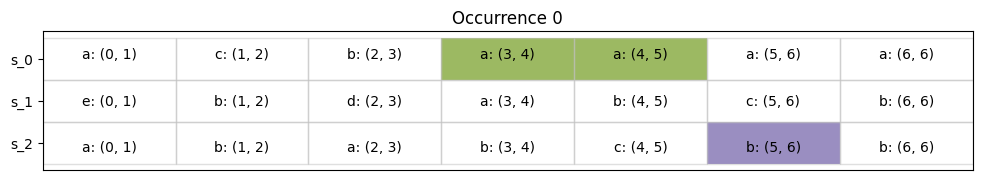

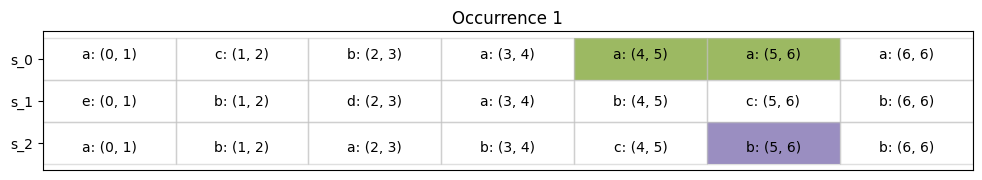

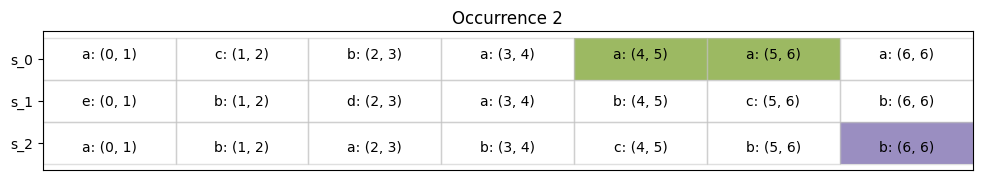

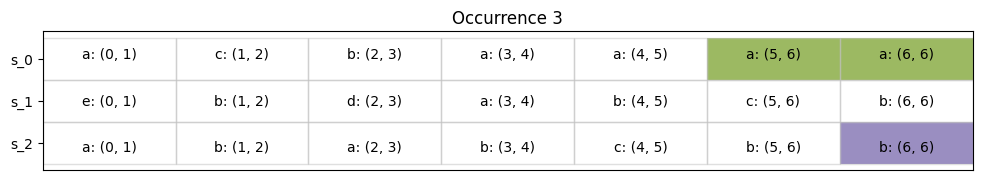

In [19]:
%autoreload
for i_pattern in range(len(patterns)):
    tree.plot(i_pattern, show_symbols=True)